In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import metrics

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# iris

In [2]:
#load data
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
x= iris.data
y= iris.target

df= pd.DataFrame(x,columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
new_df= df.copy()

In [6]:
new_df['class'] = y
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = new_df.iloc[:, :4] #  fitur
y= new_df['class'] # target

# Dataset titanic

In [8]:
data = pd.read_csv('data_cleaned.csv')

#printing the first few rows
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [9]:
data.isnull().sum().sum()

0

In [10]:
#independent variables
X = data.drop(["Survived"], axis = 1)

#dependent variables
y = data['Survived']

x.shape, y.shape

((150, 4), (891,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

teori: https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/ 

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# Voting

**hard voting**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [14]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [15]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8097014925373134
RandomForestClassifier 0.7798507462686567
SVC 0.7761194029850746
VotingClassifier 0.7947761194029851


dia akan menggabungkan semua hasil dan memberikan output baru

mengombinasikan beberapa model

**Soft voting**

In [16]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42) #svc harus di aktifkan true baru bisa soft voting

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [17]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8097014925373134
RandomForestClassifier 0.7798507462686567
SVC 0.7761194029850746
VotingClassifier 0.7985074626865671


hasilnya umumnya lebih tinggi , nilainya berdasarkan probabilitas

# bagging

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7947761194029851


**tanpa bagging**

In [20]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.7388059701492538


# Random Forest

In [21]:
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

# X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [23]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42) #nestimator adalah jumlah pohon
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [25]:
# np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

## feature importance

[referensi](https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f)

In [26]:
#misal dengan dataset iris
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [27]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

**Plotting feature importance**

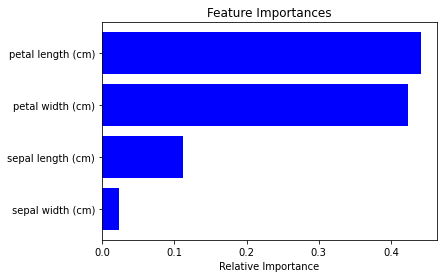

In [28]:
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Out of Bag Evaluation

https://www.analyticsvidhya.com/blog/2020/12/out-of-bag-oob-score-in-the-random-forest-algorithm/

In [29]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8138041733547352

In [30]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7947761194029851

# Adaboost

[referensi: Adaboost vs gradient boost](https://analyticsindiamag.com/adaboost-vs-gradient-boosting-a-comparison-of-leading-boosting-algorithms/#:~:text=AdaBoost%20is%20the%20first%20designed,Boosting%20more%20flexible%20than%20AdaBoost.)

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42) # semakin besar learning rate semakin cepat tetapi semakin tidak akurat
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [32]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

SAMME (yang merupakan singkatan dari Stagewise Additive Modeling using a Multiclass Exponential loss function). Ketika hanya ada dua kelas, SAMME equivalent dengan AdaBoost. 
Jika prediktor dapat memperkirakan probabilitas kelas (yaitu, jika mereka memiliki metode predict_proba()), Scikit-Learn dapat menggunakan varian SAMME yang disebut SAMME.R (R singkatan dari “Real”), yang bergantung pada probabilitas kelas daripada prediksi dan umumnya berkinerja lebih baik.


Learning rate, merupakan salah satu parameter training untuk menghitung nilai koreksi bobot pada waktu proses training. Nilai learning rate ini berada pada range nol (0) sampai (1). **Semakin besar nilai learning rate**, maka proses training akan berjalan **semakin cepat**. Semakin besar learning rate, maka **accuracy akan cenderung semakin berkurang**, tetapi berlaku sebaliknya, apabila learning rate-nya semakin kecil, maka accuracy akan semakin besar atau bertambah dengan konsekuensi proses training akan memakan waktu yang semakin lama.

In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [34]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8208955223880597

ada lagi 
### Catboost, LGBM

# XGBoost

In [36]:
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# ! pip install xgboost
from xgboost import XGBClassifier

In [37]:
xgb_reg = XGBClassifier(n_estimators=200,random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
accuracy_score(y_test, y_pred)

[13:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7686567164179104

In [38]:
# xgb = XGBClassifier(n_estimators=200, random_state=42)
# training_start = time.perf_counter()
# xgb.fit(X_train, y_train)
# training_end = time.perf_counter()
# prediction_start = time.perf_counter()
# preds = xgb.predict(X_test)
# prediction_end = time.perf_counter()
# acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
# xgb_train_time = training_end-training_start
# xgb_prediction_time = prediction_end-prediction_start
# print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
# print("Time consumed for training: %4.3f" % (xgb_train_time))
# print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

Teori ensemble learning:
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

- [loss function](https://en.wikipedia.org/wiki/Loss_function)
- [gradient descent](https://medium.com/bisa-ai/perhitungan-manual-optimasi-menggunakan-gradient-descent-a5f2f28db81b)
- [data leakage 1](https://machinelearningmastery.com/data-leakage-machine-learning/)
- [data leakage 2](https://machinelearningmastery.com/data-preparation-without-data-leakage/)